### Re-Producable yapmak için seed kullanmak lazım random_state
- training_dataset_x, testing_dataset_x, training_dataset_y, testing_dataset_y = train_test_split(dataset_x, dataset_y, random_state=123)
- model.fit(training_dataset_x, training_dataset_y, epochs=100,  batch_size=32, validation_split=0.2, shuffle=False)
- model.add(Dense(64, activation=relu, kernel_initializer=GlorotUniform(seed=13579), name="Hidden-2"))

veya

np.random.seed(123)

gibi adımlarla eğitimdeki değerlerin korunması sağlanabilir.

In [75]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu 
import pandas as pd

df = pd.read_csv('datasets/diabetes.csv')

dataset_x = df.iloc[:, :-1].values
dataset_y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split

training_dataset_x, testing_dataset_x, training_dataset_y, testing_dataset_y = train_test_split(dataset_x, dataset_y, random_state=12345)
len(training_dataset_x), len(testing_dataset_x), len(training_dataset_y), len(testing_dataset_y)

(576, 192, 576, 192)

In [76]:
from tensorflow.keras.initializers import GlorotUniform

model = Sequential(name="Sample")

model.add(Dense(64, activation=relu, kernel_initializer=GlorotUniform(seed=13579), input_shape=(dataset_x.shape[1],), name="Hidden-1"))
model.add(Dense(32, activation=relu, kernel_initializer=GlorotUniform(seed=13579), name="Hidden-2"))
model.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform(seed=13579), name="Output"))

model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Sample"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-1 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

### Yapay Sinir Ağları Katmanları

Saklı katmanlardaki nöron sayıları için çok pratik şeyler söylemek zordur. Çünkü saklı katmanlardaki nöron sayıları bazı faktörlere de bağlı olabilmektedir. Örneğin eğitimdeki kullanılacak veri miktarı, problemin karmaşıklığı, hyper parametrelerin durumları saklı katmanlardaki nöron sayısı üzerinde etkili olabilmektedir. Saklı katmanlardaki nöron sayıları için şunlar söylenebilir:

Problem karmaşıklaştıkça saklı katmanlardaki nöron sayılarını artırmak uygun olabilmektedir.

Saklı katmanlarda çok az nöron bulundurmak "underfitting" yani yetersiz öğrenmeye yol açabilmektedir.

Saklı katmanlarda gereksiz biçimde fazla sayıda nöron bulundurmak hem eğitim süresini uzatabileceği gibi hem de "overfitting" durumuna yol açabilir.

Eğitim veri kümesi azsa katmanlardaki nöron sayıları düşürülebilir.

Pek çok problemde katmanlardaki nöron sayıları çok fazla ya da çok az olmadıktan sonra önemli olmayabilmektedir.

Saklı katmanlardaki nöron sayısı girdi katmanındaki nöron sayısından az olmalıdır.

Biz genellikle genel problemlerde iki saklı katman ve katmanlarda da 64, 100, 128 gibi sayılarda nöron kullanacağız. Ancak ileride özel mimarilerde bu durumu farklılaştıracağız.

Yapay sinir ağı her farklı eğitimde farklı "w" ve "bias" değerlerini oluşturabilir. Yani ağın performansı eğitimden eğitime değişebilir. Her eğitimde ağın farklı değerlerle konumlandırılmasının nedenleri şunlardır:

train_test_split fonksiyonu her çalıştırıldığında aslında fonksiyon training_dataset ve test_dataset veri kümelerini karıştırarak elde etmektedir.

Katmanlardaki "w" değerleri programın her çalıştırılmasında rastgele bir başlangıç değeriyle set edilmektedir.

fit işleminde her epoch sonrasında veri kümesi yeniden karıştırılmaktadır.

Bir rastgele sayı üretiminde aynı üretim aynı "tohum değerden (seed)" başlatılırsa hep aynı değerler elde edilir. Bu duruma rassal sayı üretiminin "reproducible" olması denmektedir. Eğer tohum değer belirtilmezse bu tohum değer programın her çalıştırılmasında rastgele biçimde bilgisayarın saatinden alınmaktadır.

O halde eğitimden hep aynı sonucun elde edilmesi için (yani eğitimin "reproducible" hale getirilmesi için) yukarıdaki unsurların dikkate alınması gerekir.

Katmanlardaki aktivasyon fonksiyonları ne olmalıdır? Girdi katmanı gerçek bir katman olmadığında göre orada bir aktivasyon fonksiyonu yoktur.
Saklı katmanlardaki aktivasyon fonksiyonları için çeşitli seçenekler bulunmaktadır. Ancak son yıllarda pek çok problemde en çok kullanılan ve başarısı görülmüş olan aktivasyon fonksiyonu "relu (rectified linear unit)" denilen fonksiyondur. Relu fonksiyonu şöyledir:

x >= 0   ise y = x  
x <  0   ise y = 0


In [77]:
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop()
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [78]:
model.fit(training_dataset_x, training_dataset_y, epochs=100,  batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.4198 - loss: 7.3778 - val_binary_accuracy: 0.6121 - val_loss: 1.1081
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5054 - loss: 1.2635 - val_binary_accuracy: 0.6207 - val_loss: 0.7250
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5669 - loss: 0.9034 - val_binary_accuracy: 0.6466 - val_loss: 0.6899
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6024 - loss: 0.8804 - val_binary_accuracy: 0.5948 - val_loss: 0.7211
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6133 - loss: 0.8332 - val_binary_accuracy: 0.6379 - val_loss: 0.7044
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6302 - loss: 0.8427 - val_binary_accuracy: 0.6379 - val_loss: 0.6765
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6348 - loss: 0.8410 - val_binary_accuracy: 0.6207 - val_loss: 0.6795
Epoch 8/100


In [79]:
model.evaluate(testing_dataset_x, testing_dataset_y, batch_size=32)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6990 - loss: 0.8502 


[0.7892193794250488, 0.7135416865348816]

In [80]:
model.metrics_names

['loss', 'compile_metrics']

### Katmanlarda, Nöronlarda Kullanılan Aktivasyon Fonksiyonları 

Aktivasyon fonksiyonları isimsel girilebileceği gibi tensorflow.keras.activations modülündeki fonksiyonlar biçiminde de girilebilir.

from tensorflow.keras.activations import relu
...
model.add(Dense(16, activation=relu, name='Hidden'))

Bu modüldeki fonksiyonlar keras Tensorflow kullanılarak yazıldığı için çıktı olarak Tensor nesneleri vermektedir.
------------------------------------------------------------------------------------------

İkili sınıflandırma problemlerinde çıktı katmanında en fazla kullanılan aktivasyon fonksiyonu "sigmoid" isimli fonksiyondur.
Yukarıdaki "diabet" örneğinde biz çıktı katmanında sigmoid fonksiyonunu kullanmıştık. İkili sınıflandırma problemlerinde
ağın çıktı katmanında tek bir nöron bulunur ve bu nöronun da aktivasyon fonksiyonu "sigmoid" fonksiyonudur.

Peki sigmoid nasıl bir fonksiyondur? Bu fonksiyona "lojistik (logistic)" fonksiyonu da denilmektedir. Matematiksel ifadesi şöyledir:

y = e ** x / (1 + e ** x)

Burada e 2.71828... biçiminde irrasyonel e sayısıdır. Yukarıdaki kesrin pay ve paydası e ** x ile çarpılırsa fonksiyon aşağıdaki
gibi de ifade edilebilir:

y = 1 / (1 + e ** -x)
Sigmoid eğrisi x = 0 için 0.5 değerini veren x pozitif yönde arttıkça 1 değerine yaklaşan, x negatif yönde arttıkça 0
değerine yaklaşan S şeklinde bir eğridir. Sigmoid fonksiyonu (0, 1) arasında bir değer vermektedir. Bu nedenle çıktı katmanındaki
nöronun aktivasyon fonksiyonu sigmoid ise ağdan sonuç olarak 0 ile 1 arasında noktalı bir sayı elde edilir. İşte biz de bu sayı
0.5'ten büyükse onu 1 olarak, 0.5'ten küçükse 0 olarak değerlendiririz. Tabii aslında çıktı bir olasılık da belirtmektedir.
Yani ağın çıktısı 1'e ne kadar yaklaşmışsa o kestirimin 1 olma olasılığı o kadar yüksek, ağın çıktısı 0'a ne kadar yaklaşmışsa
o kestirimin 0 olma olasılığı o kadar yüksek olur.

Sigmoid eğrisi aşağıdaki gibi çizilebilir.
------------------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = np.e ** x / (1 + np.e ** x)

plt.title('Sigmoid (Logistic) Function', fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-1, 1)

plt.plot(x, y)
plt.show()

Aşağıda da sigmoid fonksiyonun birinci türevi alınmıştır. Sigmoid fonksiyonunun birinci türevi Gauss eğrisine benzemektedir.
------------------------------------------------------------------------------------------

import sympy

x = sympy.Symbol('x')
fx = sympy.E ** x / (1 + sympy.E ** x)
dx = sympy.diff(fx, x)

from sympy import init_printing

init_printing()

print(dx)

import numpy as np

np.linspace(-10, 10, 1000)
pdx = sympy.lambdify(x, dx)

x = np.linspace(-10, 10, 1000)
y = pdx(x)

import matplotlib.pyplot as plt

plt.title('First Derivative of Sigmoid Function', fontsize=14, pad=20, fontweight='bold')
axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['top'].set_color(None)
axis.spines['right'].set_color(None)

axis.set_ylim(-1, 1)

plt.plot(x, y)
plt.show()


**Diger cok kullanılan bir aktivasyon fonksiyonu da "hiperbolic tangent" fonksiyonudur. Bu fonksiyon "tanh" ismiyle Keras'ta kullanılabilmektedir. Fonksiyonun matematiksel ifadesi şöyledir:**

\[ f(x) = (e^{**} (2 * x) - 1) / (e^{**} (2 * x) + 1) \]

**Tanh fonksiyonu adeta sigmoid fonksiyonunun (-1, 1) arası değer alan biçimi gibidir. Fonksiyon yine S şekli biçimindedir.**

**Tanh fonksiyonu saklı katmanlarda da bazen çıktı katmanlarında da kullanılabilmektedir. Eskiden bu fonksiyon çok yoğun kullanılıyordu. Ancak artık saklı katmanlarda en çok ReLU fonksiyonu tercih edilmektedir.**  

**Fonksiyonun grafiğini aşağıdaki gibi çizdirebiliriz:**

```python
import numpy as np  
import matplotlib.pyplot as plt  

x = np.linspace(-10, 10, 1000)  
y = (np.e^{**} (2 * x) - 1) / (np.e^{**} (2 * x) + 1)  

plt.title('Hiperbolic Tangent (tanh) Function', fontsize=14, pad=20, fontweight='bold')  
axis = plt.gca()  
axis.spines['left'].set_position('center')  
axis.spines['bottom'].set_position('center')  
axis.spines['top'].set_color(None)  
axis.spines['right'].set_color(None)  

axis.set_ylim(-1, 1)  

plt.plot(x, y)
```

---

**Diğer çok karşılaşılan bir aktivasyon fonksiyonu da "softmax" isimli fonksiyondur. Softmax fonksiyonu çok sınıflı sınıflandırma problemlerinde çıktı katmanlarında kullanılmaktadır. Örneğin bir resmin "elma", "armut", "kayısı", "şeftali", "karpuz" resimlerinden hangisi olduğunu anlamak için kullanılan sınıflandırma modeli çok sınıflı bir sınıflandırma modelidir. Buna istatistikte "çok sınıflı lojistik regresyon (multinomial logistic regression)" da denilmektedir. Bu tür problemlerde sinir ağında sınıf sayısı kadar nöron bulundurulur. Örneğin yukarıdaki resim sınıflandırma probleminde ağın çıktısında 5 nöron bulunmalıdır.**

**Ağın çıktı katmanındaki tüm nöronların aktivasyon fonksiyonları softmax yapılırsa tüm çıktı katmanındaki nöronların çıktı değerlerinin toplamı her zaman 1 olur. Böylece adeta çıktı nöronlarının çıktı değerleri ilgili sınıfın olasılığını belirtmektedir. Biz de toplamı 1 olan çıktıların en yüksek değerine bakarız ve sınıflandırmanın o sınıfı kestirdiğini düşünürüz. Örneğin yukarıdaki resim sınıflandırmasında çıktı katmanında 5 nöron olacaktır. Bu nöronların çıktılarının toplamı da 1 olacaktır. Aşağıdaki gibi bir kestirim sonucu elde edilmiş olsun:**

```
Elma Nöronunun Çıktısı --> 0.2
Armut Nöronunun Çıktısı --> 0.2
Kayısı Nöronunun Çıktısı --> 0.3
Şeftali Nöronunun Çıktısı --> 0.2
Karpuz Nöronunun Çıktısı --> 0.2
```

**Burada en büyük çıktı 0.3 olan Kayısı nöronuna ilişkindir. O halde biz bu kestirimin "kayısı" olduğuna karar veririz. Softmax fonksiyonu şöyle hesaplanmaktadır. Elimizde aşağıdaki gibi x değerleri olsun:**

```python
>>> import numpy as np
>>> x = np.array([3, 6, 4, 1, 7])
>>> x
array([3, 6, 4, 1, 7])
```

**Bu değerlerin softmax değerleri `np.e ** x / np.sum(e ** x)` biçimindedir.**

```python
>>> sm = np.e ** x / np.sum(np.e ** x)
>>> sm
array([0.0127328 , 0.25574518, 0.03461135, 0.0017232 , 0.69518747])
>>> np.sum(sm)
1.0
```

**Keras aslında çıktı katmanlarındaki tüm softmax aktivasyon fonksiyonlarının bir grup oluşturduğunu varsayar. Sonra girdilerle ağırlık değerlerini çarpıp bias değeriyle toplayarak yukarıdaki gibi bir x vektörü elde eder. Sonra da yukarıdaki işlemi uygular. Başka bir deyişle çıktı katmanındaki softmax aktivasyon fonksiyonuna sahip olan nöronlar bir grup olarak değerlendirilmektedir.**

---

**Diğer çok kullanılan aktivasyon fonksiyonlarından biri de "linear" aktivasyon fonksiyonudur. Aslında bu fonksiyon y = x fonksiyonudur. Yani girdi ile aynı değeri üretmektedir. Başka bir deyişle bir şey yapmayan bir fonksiyondur. Peki böyle bir aktivasyon fonksiyonunun ne anlamı olabilir? Bu aktivasyon fonksiyonu "lojistik olmayan regresyon problemlerinde" çıktı katmanında kullanılmaktadır.**  

**Lojistik olmayan regresyon problemleri çıktı olarak bir sınıf bilgisi değil bir sayı bulmaya çalışan problemlerdir. Örneğin bir evin fiyatı, bir otomobilin mil başına yaktığı yakıt miktarı gibi problemler lojistik olmayan regresyon problemleridir. Bu aktivasyon fonksiyonu Keras'ta "linear" ismiyle kullanılmaktadır.**

#### Relu Function


In [82]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = np.maximum(x, 0)

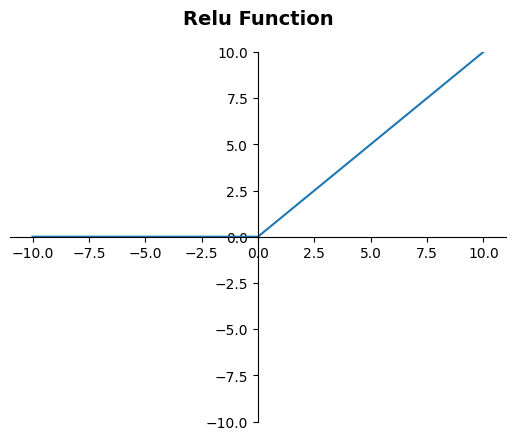

In [84]:
plt.title("Relu Function", fontsize=14, pad=20, fontweight='bold')

axis = plt.gca()
axis.spines['left'].set_position('center')
axis.spines['bottom'].set_position('center')
axis.spines['right'].set_color(None)
axis.spines['top'].set_color(None)
axis.set_ylim(-10, 10)

plt.plot(x, y)
plt.show()

### Loss Fonksiyonları